In [119]:
#Reading Customer Churn Dataset

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
# Load dataset
df = pd.read_csv("../data/telecom_churn.csv")

# Display basic info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [122]:
# Check for missing values in TotalCharges
missing_total_charges = df["TotalCharges"].isnull().sum()
print(f"Missing values in TotalCharges: {missing_total_charges}")

Missing values in TotalCharges: 0


In [123]:
# Check for missing values
print("Missing values before filling:", df.isna().sum().sum())

Missing values before filling: 0


In [124]:
# Count missing values in each column
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [125]:
df.duplicated().sum()


np.int64(0)

In [126]:
# Replace empty strings or spaces with NaN before converting
df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan)

# Convert to float after handling empty values
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Fill NaN values with 0 (or median/mean if preferred)
df["TotalCharges"].fillna(0, inplace=True)

# Confirm changes
print(df["TotalCharges"].dtype)  # Should be float64
print(f"Missing values in TotalCharges: {df['TotalCharges'].isnull().sum()}")  # Should be 0


float64
Missing values in TotalCharges: 0


In [127]:
# Display unique values in categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")


customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [128]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# Analysis of personal Attributes

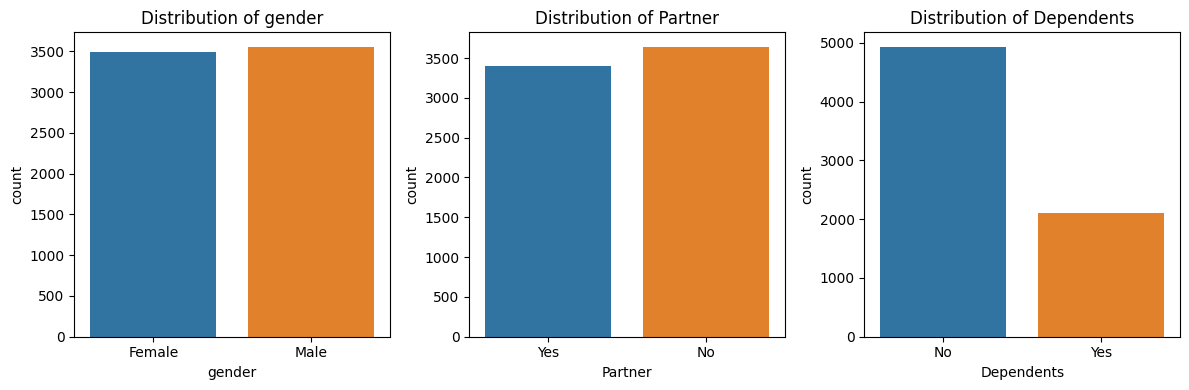

In [129]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
personal_cols = ["gender", "Partner", "Dependents"]

plt.figure(figsize=(12, 4))
for i, col in enumerate(personal_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=col, data=df,  hue=col, legend=False)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


# Analysis of Services

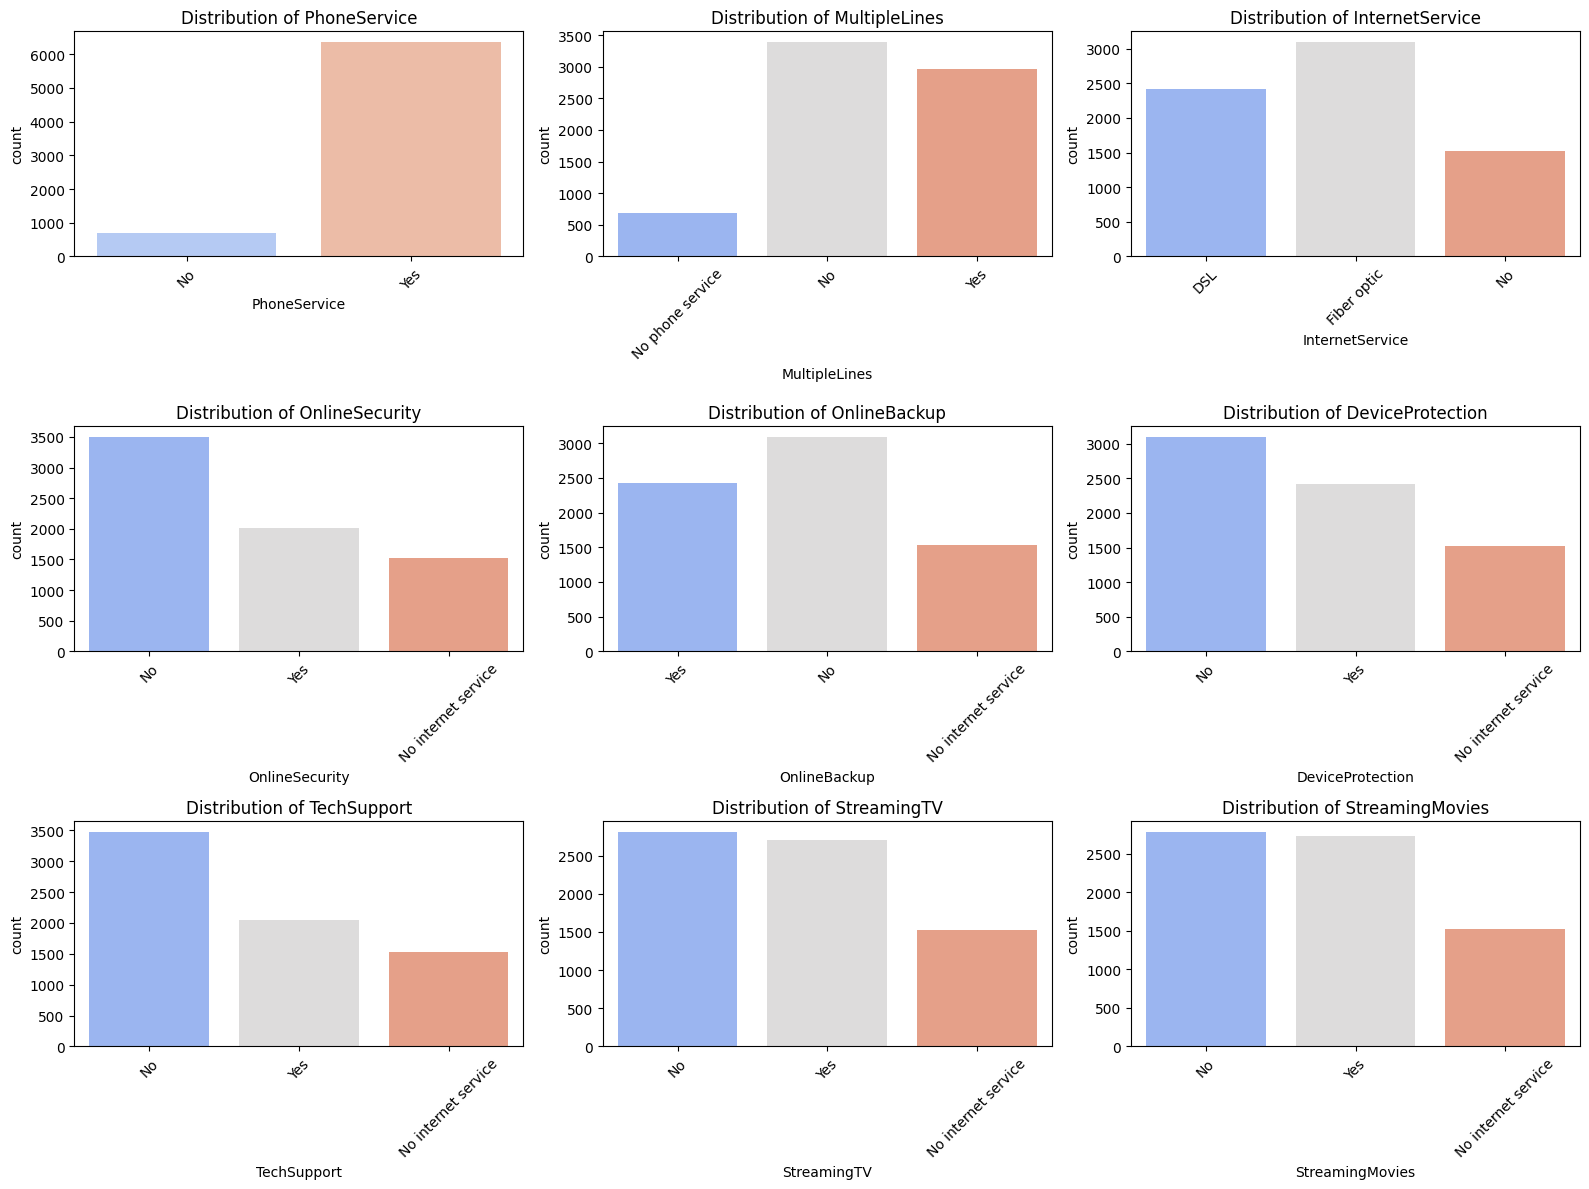

In [130]:
service_cols = [
    "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", 
    "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"
]

plt.figure(figsize=(16, 12))
for i, col in enumerate(service_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col,data = df, palette="coolwarm")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Analysis of Contract and Payments

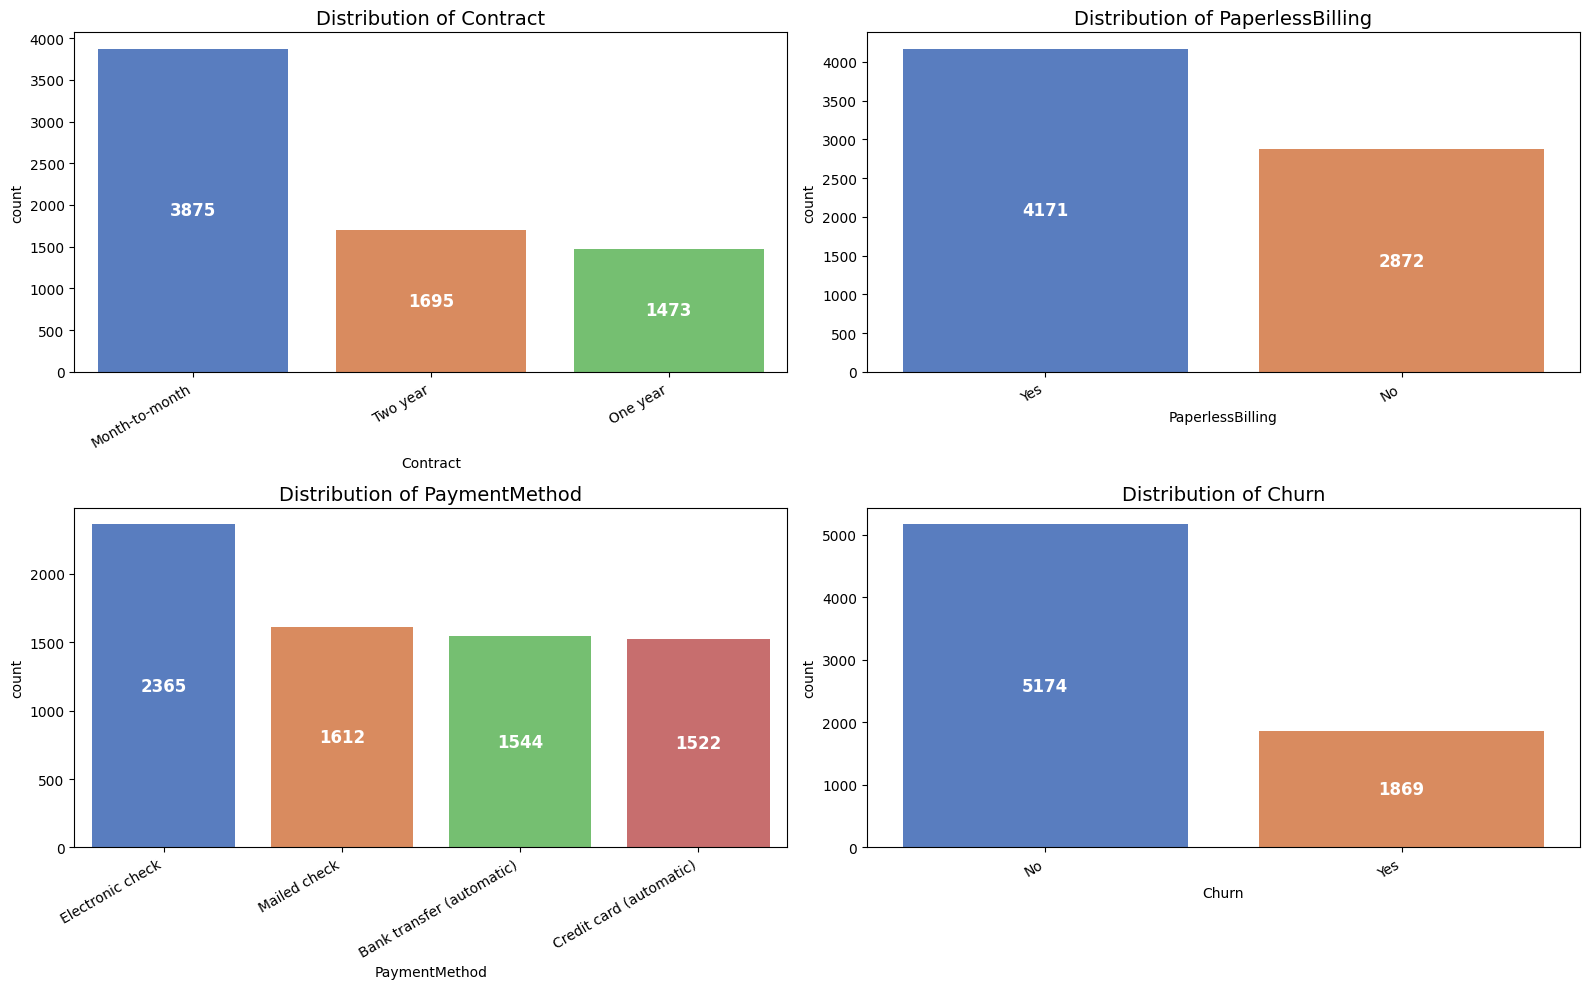

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

contract_cols = ["Contract", "PaperlessBilling", "PaymentMethod", "Churn"]

plt.figure(figsize=(16, 10))  # Increase figure size

for i, col in enumerate(contract_cols, 1):
    plt.subplot(2, 2, i)
    
    # Create countplot
    ax = sns.countplot(x=col, data=df, palette="muted", order=df[col].value_counts().index)
    
    # Add count labels inside the bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height() / 2),  # Position inside bar
                    ha='center', va='center', fontsize=12, fontweight="bold", color="white")  # White text for visibility

    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xticks(rotation=30, ha="right")  # Rotate for better readability

plt.tight_layout()
plt.show()


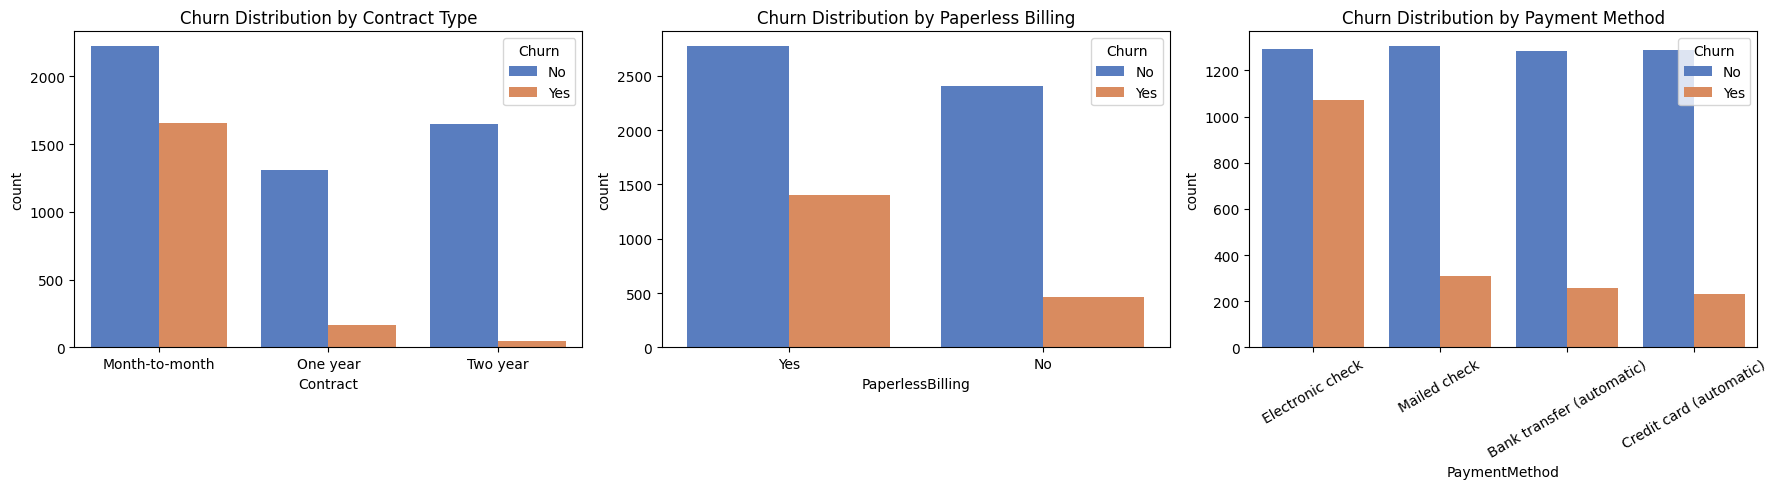

In [132]:

import seaborn as sns
import matplotlib.pyplot as plt

# Define categories for ordering
contract_order = ["Month-to-month", "One year", "Two year"]
billing_order = ["Yes", "No"]
payment_order = ["Electronic check", "Mailed check", "Bank transfer (automatic)", "Credit card (automatic)"]

# Set figure size
plt.figure(figsize=(18, 5))

# 1️⃣ Churn vs. Contract Type
plt.subplot(1, 3, 1)
sns.countplot(x="Contract", hue="Churn", data=df, palette="muted", order=contract_order)
plt.title("Churn Distribution by Contract Type")

# 2️⃣ Churn vs. Paperless Billing
plt.subplot(1, 3, 2)
sns.countplot(x="PaperlessBilling", hue="Churn", data=df, palette="muted", order=billing_order)
plt.title("Churn Distribution by Paperless Billing")

# 3️⃣ Churn vs. Payment Method
plt.subplot(1, 3, 3)
sns.countplot(x="PaymentMethod", hue="Churn", data=df, palette="muted", order=payment_order)
plt.xticks(rotation=30)
plt.title("Churn Distribution by Payment Method")

# Show all plots
plt.tight_layout()
plt.show()


# performing statistical test - chi-square hypothesis testing (Categorical)


In [133]:
import scipy.stats as stats
import pandas as pd

# H₀ (Null Hypothesis): Contract has no significant impact on customer churn.
# H₁ (Alternate Hypothesis): Contract billing significantly affects customer churn.

# Create a contingency table
contingency_table = pd.crosstab(df["Contract"], df["Churn"])

# Perform Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")

# Interpretation
if p < 0.05:
    print("Reject Null Hypothesis: Contract type significantly affects churn.")
else:
    print("Fail to Reject Null Hypothesis: No significant relationship.")


Chi-Square Statistic: 1184.5965720837926
P-Value: 5.863038300673393e-258
Reject Null Hypothesis: Contract type significantly affects churn.


In [134]:
import scipy.stats as stats
import pandas as pd

# H₀ (Null Hypothesis): Payment Method has no significant impact on customer churn.
# H₁ (Alternate Hypothesis): Payment Method significantly affects customer churn.

# Create a contingency table
contingency_table = pd.crosstab(df["PaymentMethod"], df["Churn"])

# Perform Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")

# Interpretation
if p < 0.05:
    print("Reject Null Hypothesis: Payment Method significantly affects churn.")
else:
    print("Fail to Reject Null Hypothesis: No significant relationship.")


Chi-Square Statistic: 648.1423274814
P-Value: 3.6823546520098007e-140
Reject Null Hypothesis: Payment Method significantly affects churn.


In [135]:
import scipy.stats as stats
import pandas as pd

# H₀ (Null Hypothesis): Paperless billing has no significant impact on customer churn.
# H₁ (Alternate Hypothesis): Paperless billing significantly affects customer churn.

# Create a contingency table
contingency_table = pd.crosstab(df["PaperlessBilling"], df["Churn"])

# Perform Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")

# Interpretation
if p < 0.05:
    print("Reject Null Hypothesis: PaperlessBilling significantly affects churn.")
else:
    print("Fail to Reject Null Hypothesis: PaperlessBilling has No significant relationship.")


Chi-Square Statistic: 258.27764906707307
P-Value: 4.0733546686659864e-58
Reject Null Hypothesis: PaperlessBilling significantly affects churn.


# Feature Engineering

## dropping unnecessary column

In [136]:
# Drop customerID (not useful for prediction)
df.drop(columns=["customerID"], inplace=True)

In [137]:
print(df["SeniorCitizen"].unique())


[0 1]


# scaling numerical columns

## Checking for distribution

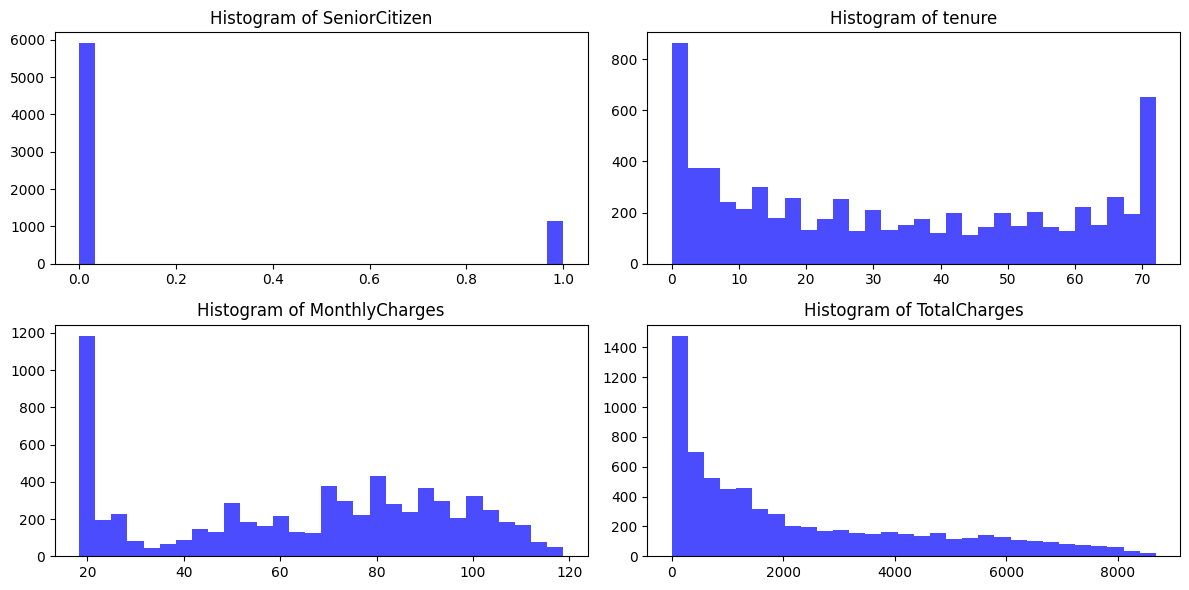

In [138]:
# Distribution analysis- before scaling
import matplotlib.pyplot as plt

num_features = ["SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges"]

plt.figure(figsize=(12, 6))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col], bins=30, color="blue", alpha=0.7)
    plt.title(f"Histogram of {col}")
plt.tight_layout()
plt.show()


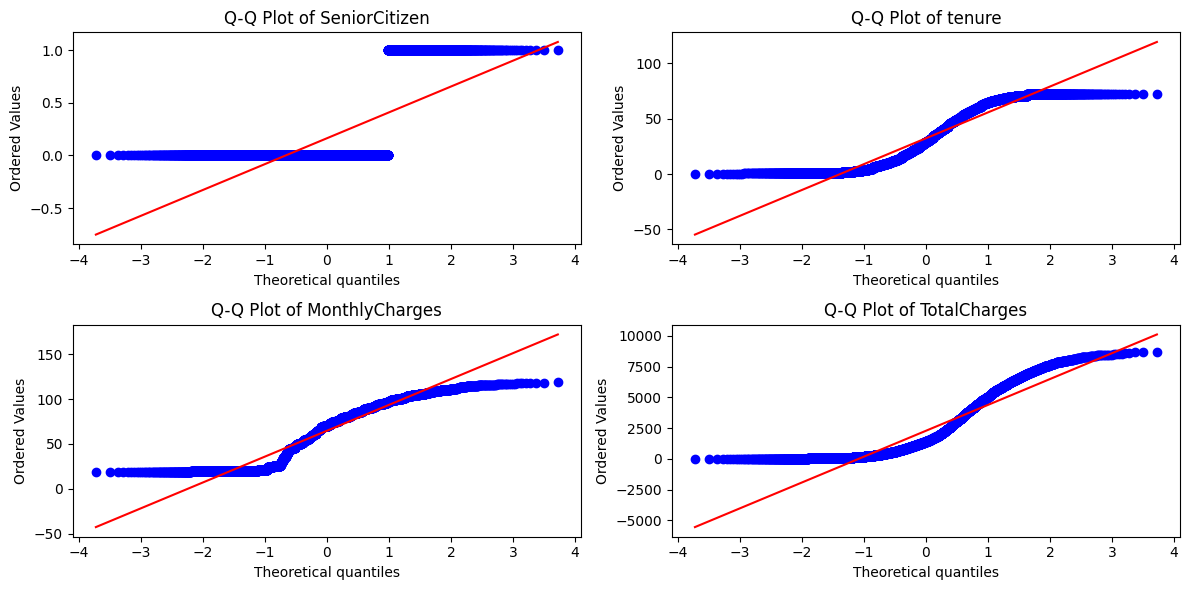

In [139]:
#Outlier Detection
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {col}")
plt.tight_layout()
plt.show()


In [140]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Apply log transformation only to highly skewed features
df[["MonthlyCharges", "TotalCharges"]] = np.log1p(df[["MonthlyCharges", "TotalCharges"]])

# Apply StandardScaler to all numerical variables
scaler = StandardScaler()
num_features = ["tenure", "MonthlyCharges", "TotalCharges"]  # SeniorCitizen can be included but it's binary

df[num_features] = scaler.fit_transform(df[num_features])


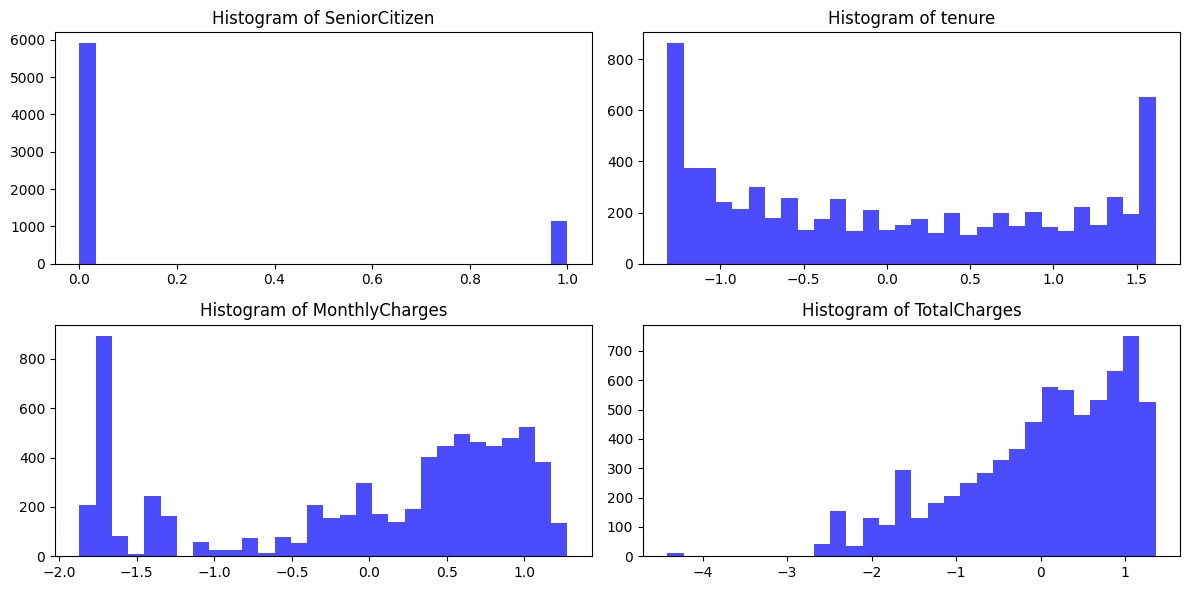

In [141]:
# Histograms after Normalization
import matplotlib.pyplot as plt

num_features = ["SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges"]

plt.figure(figsize=(12, 6))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col], bins=30, color="blue", alpha=0.7)
    plt.title(f"Histogram of {col}")
plt.tight_layout()
plt.show()


# Label Encoding Categorical columns

In [142]:
print(df.head())

   gender  SeniorCitizen Partner Dependents    tenure PhoneService  \
0  Female              0     Yes         No -1.277445           No   
1    Male              0      No         No  0.066327          Yes   
2    Male              0      No         No -1.236724          Yes   
3    Male              0      No         No  0.514251           No   
4  Female              0      No         No -1.236724          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes  

In [143]:
import pandas as pd

# List of categorical columns
binary_cols = ["gender", "Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
multi_class_cols = ["MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
                    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
                    "Contract", "PaymentMethod"]

# Convert binary categorical columns to 0 and 1
df[binary_cols] = df[binary_cols].replace({"Yes": 1, "No": 0, "Female": 1, "Male": 0})

# One-Hot Encoding for multi-class categorical columns
df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)  # drop_first=True avoids dummy variable trap
df = df.astype(int)  # Convert all Boolean values to 0/1

In [144]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,-1,0,1,-1,-2,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,-1,1,1,0,-1,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,-1,1,1,0,-1,1,...,0,0,0,0,0,0,0,0,1,0
